In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as smp
from matplotlib import animation
from matplotlib.animation import PillowWriter
print("Import Successful")

Import Successful


In [32]:
t, g, l1, l2, m1, m2, m3, k, L0 = smp.symbols('t g l_1 l_2 m_1 m_2 m_3 k L_0')
theta1, theta2 = smp.symbols(r'\theta_1 \theta_2', cls=smp.Function)

In [33]:
theta1 = theta1(t)
theta2 = theta2(t)
theta1_d =smp.diff(theta1, t)
theta2_d = smp.diff(theta2, t)
theta1_dd = smp.diff(theta1_d, t)
theta2_dd = smp.diff(theta2_d, t)

In [34]:
x_1 = l1 * smp.cos(theta1)
y_1 = -l1 * smp.sin(theta1)
x_2 = 2*x_1
y_2 = 0
x_3 = x_2 + l2*smp.sin(theta2)
y_3 = -l2*smp.cos(theta2)

In [35]:
T = smp.Rational(1, 2) * m1 * (smp.diff(x_1, t) ** 2 + smp.diff(y_1, t) ** 2) \
    + smp.Rational(1,2) * m2 * (smp.diff(x_2, t) ** 2 + smp.diff(y_2, t) ** 2) \
    + smp.Rational(1, 2) * m3 * (smp.diff(x_3, t) ** 2 +smp.diff(y_3, t) ** 2)
    
V = m1*g*y_1 + m2*g*y_2 + m3*g*y_3 + smp.Rational(1, 2) * k * (x_2 - L0) ** 2
L = T - V

In [18]:
L

g*l_1*m_1*sin(\theta_1(t)) + g*l_2*m_3*cos(\theta_2(t)) - k*(-l_0 + 2*l_1*cos(\theta_1(t)))**2/2 + 2*l_1**2*m_2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + m_1*(l_1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + l_1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2)/2 + m_3*(l_2**2*sin(\theta_2(t))**2*Derivative(\theta_2(t), t)**2 + (-2*l_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)/2

In [36]:
LE1 = smp.diff(L, theta1) - smp.diff(smp.diff(L, theta1_d), t).simplify()
LE2 = smp.diff(L, theta2) - smp.diff(smp.diff(L, theta2_d), t).simplify()

In [37]:
sols = smp.solve([LE1, LE2 ], (theta1_dd, theta2_dd), simplify = False, rational = False)
sols

{Derivative(\theta_1(t), (t, 2)): 2*L_0*k*sin(\theta_1(t))/(-l_1*m_1 - 4*l_1*m_2*sin(\theta_1(t))**2 + 4*l_1*m_3*sin(\theta_1(t))**2*cos(\theta_2(t))**2 - 4*l_1*m_3*sin(\theta_1(t))**2) - g*m_1*cos(\theta_1(t))/(-l_1*m_1 - 4*l_1*m_2*sin(\theta_1(t))**2 + 4*l_1*m_3*sin(\theta_1(t))**2*cos(\theta_2(t))**2 - 4*l_1*m_3*sin(\theta_1(t))**2) + 2*g*m_3*sin(\theta_1(t))*sin(\theta_2(t))*cos(\theta_2(t))/(-l_1*m_1 - 4*l_1*m_2*sin(\theta_1(t))**2 + 4*l_1*m_3*sin(\theta_1(t))**2*cos(\theta_2(t))**2 - 4*l_1*m_3*sin(\theta_1(t))**2) - 4*k*l_1*sin(\theta_1(t))*cos(\theta_1(t))/(-l_1*m_1 - 4*l_1*m_2*sin(\theta_1(t))**2 + 4*l_1*m_3*sin(\theta_1(t))**2*cos(\theta_2(t))**2 - 4*l_1*m_3*sin(\theta_1(t))**2) - 4*l_1*m_2*sin(\theta_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2/(-l_1*m_1 - 4*l_1*m_2*sin(\theta_1(t))**2 + 4*l_1*m_3*sin(\theta_1(t))**2*cos(\theta_2(t))**2 - 4*l_1*m_3*sin(\theta_1(t))**2) + 4*l_1*m_2*sin(2*\theta_1(t))*Derivative(\theta_1(t), t)**2/(-l_1*m_1 - 4*l_1*m_2*sin(\theta_1(t))*

In [39]:
dz1dt_f = smp.lambdify((t,g,k,L0,m1,m2,m3,l1,l2,theta1,theta2,theta1_d,theta2_d), sols[theta1_dd])
dz2dt_f = smp.lambdify((t,g,k,L0,m1,m2,m3,l1,l2,theta1,theta2,theta1_d,theta2_d), sols[theta2_dd])
dthe1dt_f = smp.lambdify(theta1_d, theta1_d)
dthe2dt_f = smp.lambdify(theta2_d, theta2_d)

In [40]:
def dSdt(S, t, g, k, L0, m1, m2, m3, l1, l2):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t,g,k,L0,m1,m2,m3,l1,l2,the1,the2,z1,z2),
        dthe2dt_f(z2),
        dz2dt_f(t,g,k,L0,m1,m2,m3,l1,l2,the1,the2,z1,z2),
    ]

In [41]:
t = np.linspace(0, 40, 1001) # s
g = 9.81 #m/s^2
k = 30 # N/m
m1=2 # kg
m2=2 # kg
m3=1 # kg
l1 = 1 # m
l2 = 1 # m
L0 = 1.5*l1 # m
ans = odeint(dSdt, y0=[1, -1, -1, 1], t=t, args=(g, k, L0, m1, m2, m3, l1, l2))

In [42]:
theta1 = ans.T[0]
theta2 = ans.T[2]

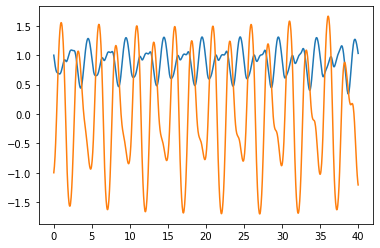

In [43]:
plt.plot(t, theta1)
plt.plot(t, theta2)

In [44]:
def get_x1y1x2y2x3y3(t, the1, the2, l1, l2):
    return (l1*np.cos(the1),
            -l1*np.sin(the1),
            2*l1*np.cos(the1),
            np.zeros(len(the1)),
            2*l1*np.cos(the1) + l2*np.sin(the2),
            -l2*np.cos(the2))

x1, y1, x2, y2, x3, y3 = get_x1y1x2y2x3y3(t, ans.T[0], ans.T[2], l1, l2)

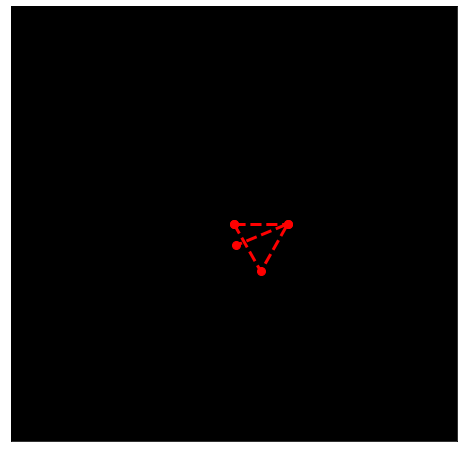

In [47]:

def animate(i):
    ln1.set_data([0, x1[i], x2[i], x3[i]], [0, y1[i], y2[i], y3[i]])
    ln2.set_data([0, x2[i]], [0, y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    
ax.get_yaxis().set_ticks([])    
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ln2, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=25)